In [3]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [4]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [5]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

Leitura Resultados
===

In [6]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)

In [99]:
modelsName = c("fourier_" 
               ,"wavelet_" 
               ,"ssa_"
               ,"emdrp_"
               #,"emdmi_" 
               ,"forcedec_" 
               ,"forcedectopo_" 
               #,"forcedectimedomain_"
              )
listResult = list()
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

In [79]:
idx = matrix(1:55, ncol=11, byrow=T)
rFake = rbind((listResult[[5]])[1,],
              (listResult[[7]])[1:32,],
              (listResult[[5]])[34:55,]
             )
rFake$tech = 'Fake'
listResult[[8]] = rFake

Métrica: MDDL
===

pdf 
  2

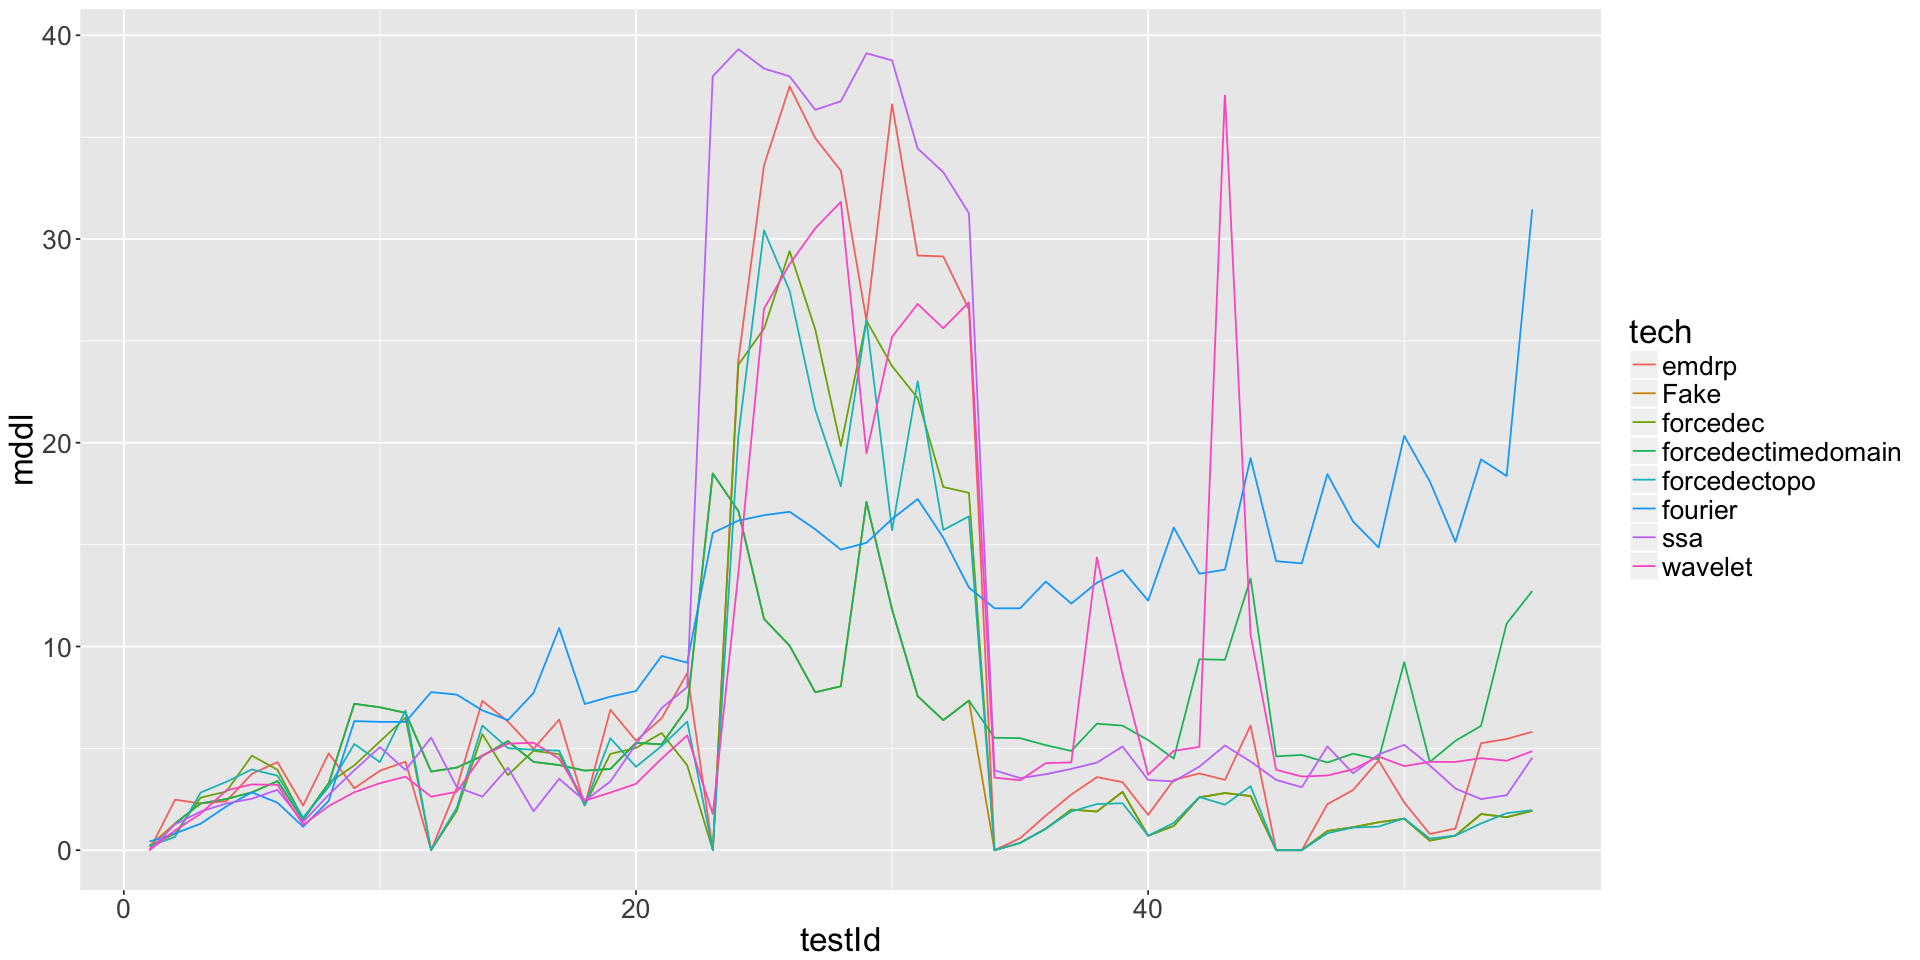

In [68]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

In [76]:
options(repr.plot.width=16, repr.plot.height=8)

dataset.names  = c('Sine', 'Lorenz', 'Rossler', 'Logistic', 'Henon')
dataset.idxs   = matrix(1:(11*5), ncol=11, byrow=T)
data           = c()
for(i in 1:length(listResult)){
    techResult = listResult[[i]]
    techName   = unique(techResult$tech)
    for(j in 1:5){
        data   = rbind(data, c(techName
                              ,dataset.names[j]
                              ,mean(techResult$mddl[dataset.idxs[j,]])
                              ,sd(techResult$mddl[dataset.idxs[j,]])
                              )
                       )
    }
    #cat(dataset.names[floor(listResult[[i]]$testId / 11.1) + 1])
}
colnames(data) = c('Tech', 'Series', 'MDDL', 'sd')
data = data.frame(data)
data$MDDL = as.numeric(levels(data$MDDL))[data$MDDL]
data$sd = as.numeric(levels(data$sd))[data$sd]
#data
#ggplot(data, aes(x = Series, y = MDDL, color = Tech))  +
    #geom_errorbar(aes(ymin=Mean-sd, ymax=Mean+sd), width=.1, colour="black") +
    #geom_line() + 
    #geom_point(size=3) +
    #theme(text = element_text(size=20))
#dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

In [69]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){
    cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))
})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,11.7077207126322,6.14722573455826
wavelet,8.58930771309564,9.68924838267543
ssa,10.2825670158012,13.4379932963978
emdrp,8.41806347935233,11.1446554132369
forcedec,6.17976125749836,8.39198273227684
forcedectopo,5.91864725901162,7.89072508077756
forcedectimedomain,6.65405162673724,3.78501384939433
Fake,4.40323904272597,4.28659527061979


pdf 
  2

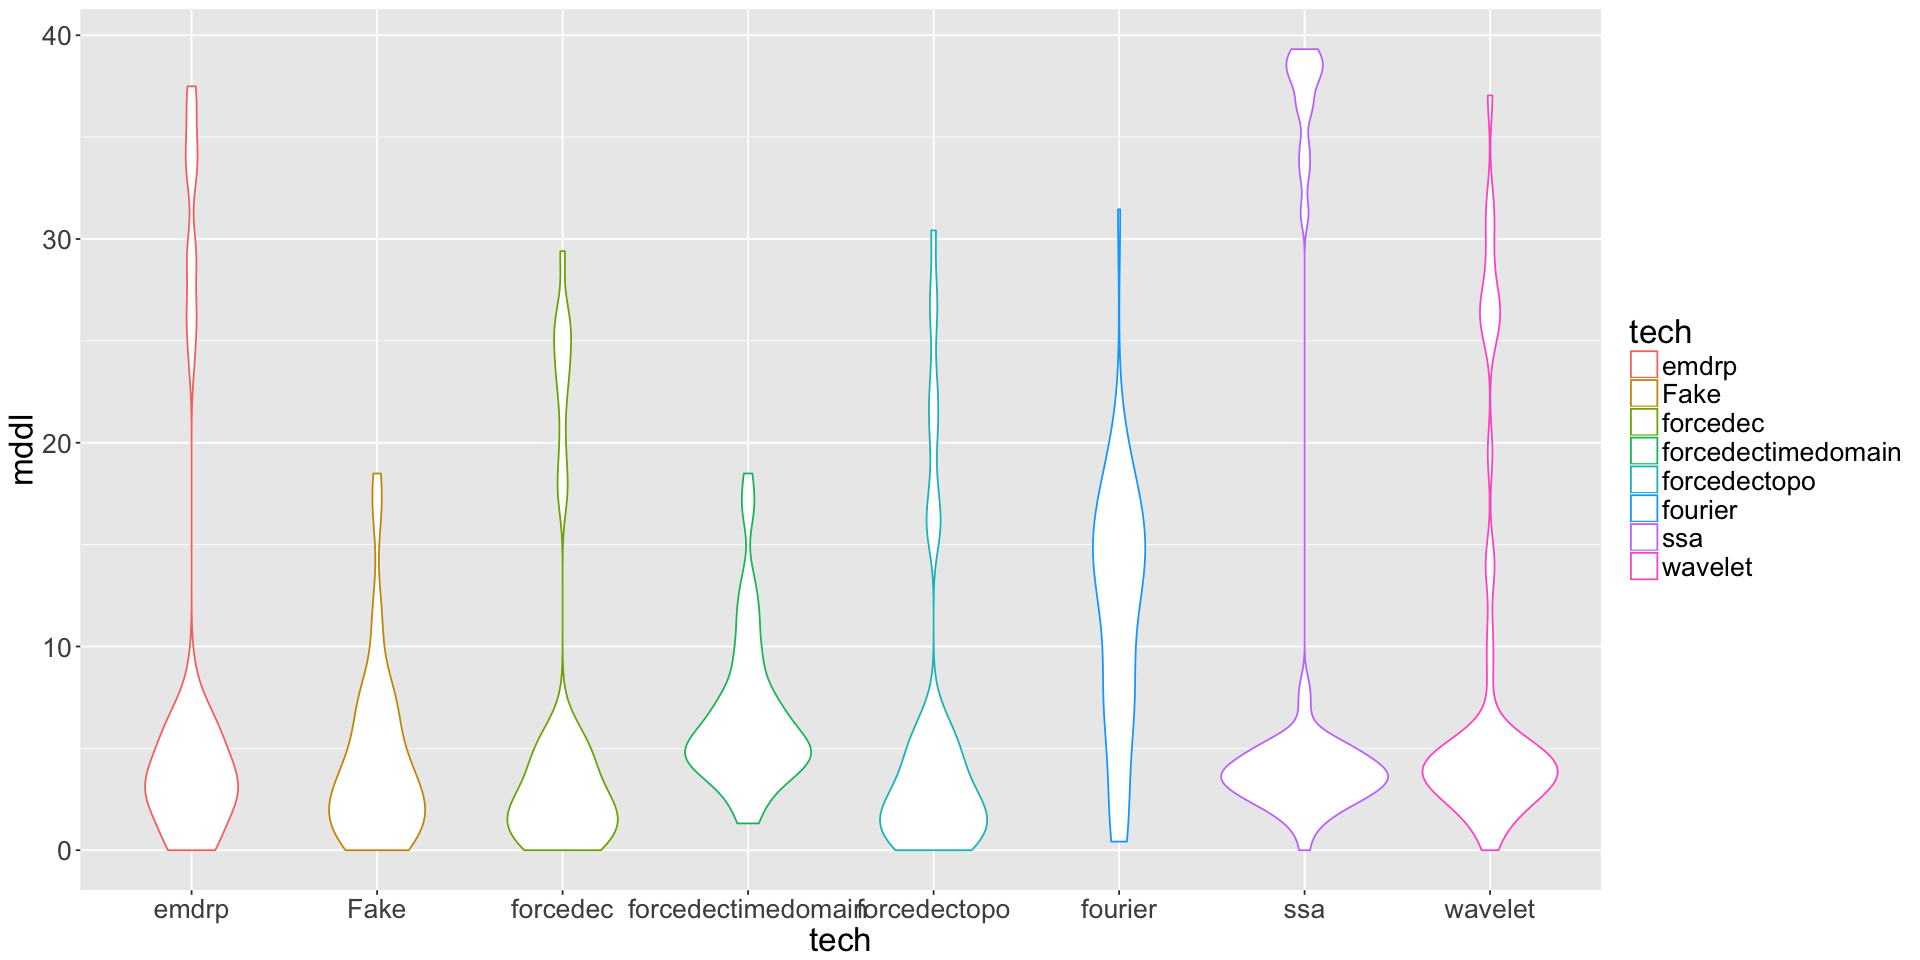

In [70]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(tech, mddl, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_violin.pdf", sep='/'), width=16, height=5)

pdf 
  2

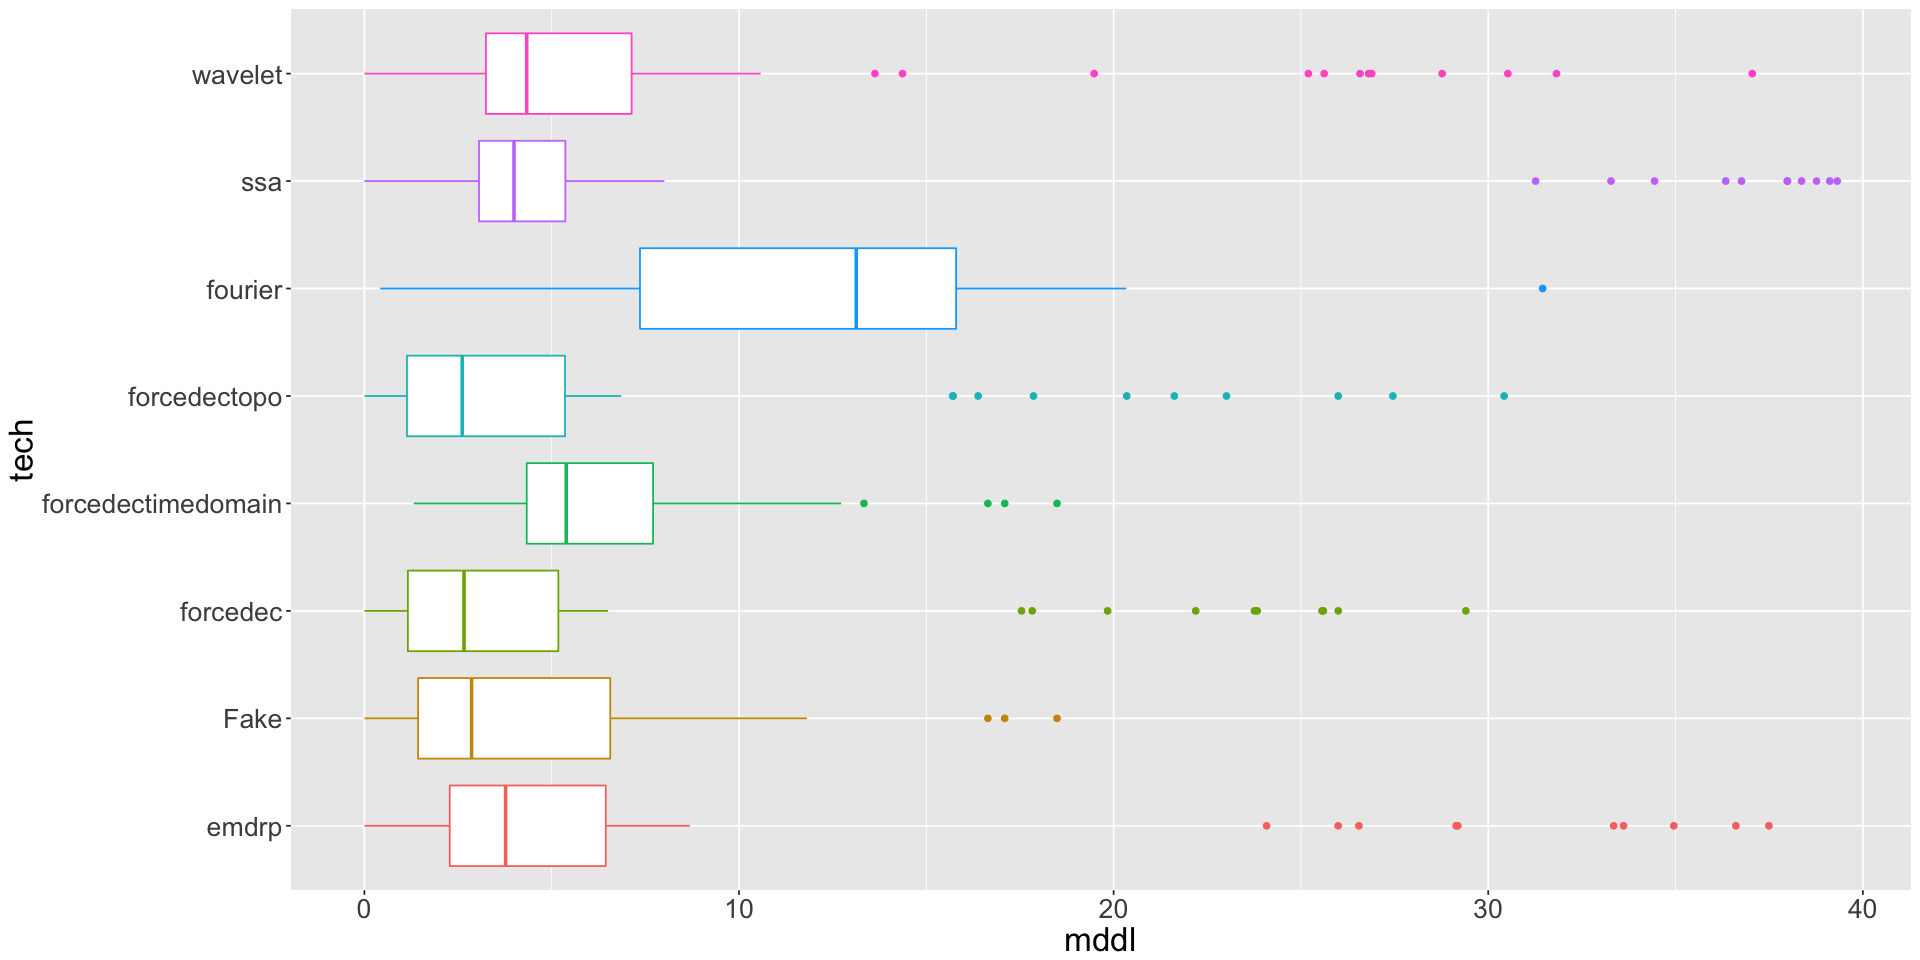

In [71]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, mddl, color = tech)) +
    geom_boxplot() +
    coord_flip() +
    theme(text = element_text(size=20), legend.position="none")
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_boxplot.pdf", sep='/'), width=16, height=5)

Métrica: MDA
===

pdf 
  2

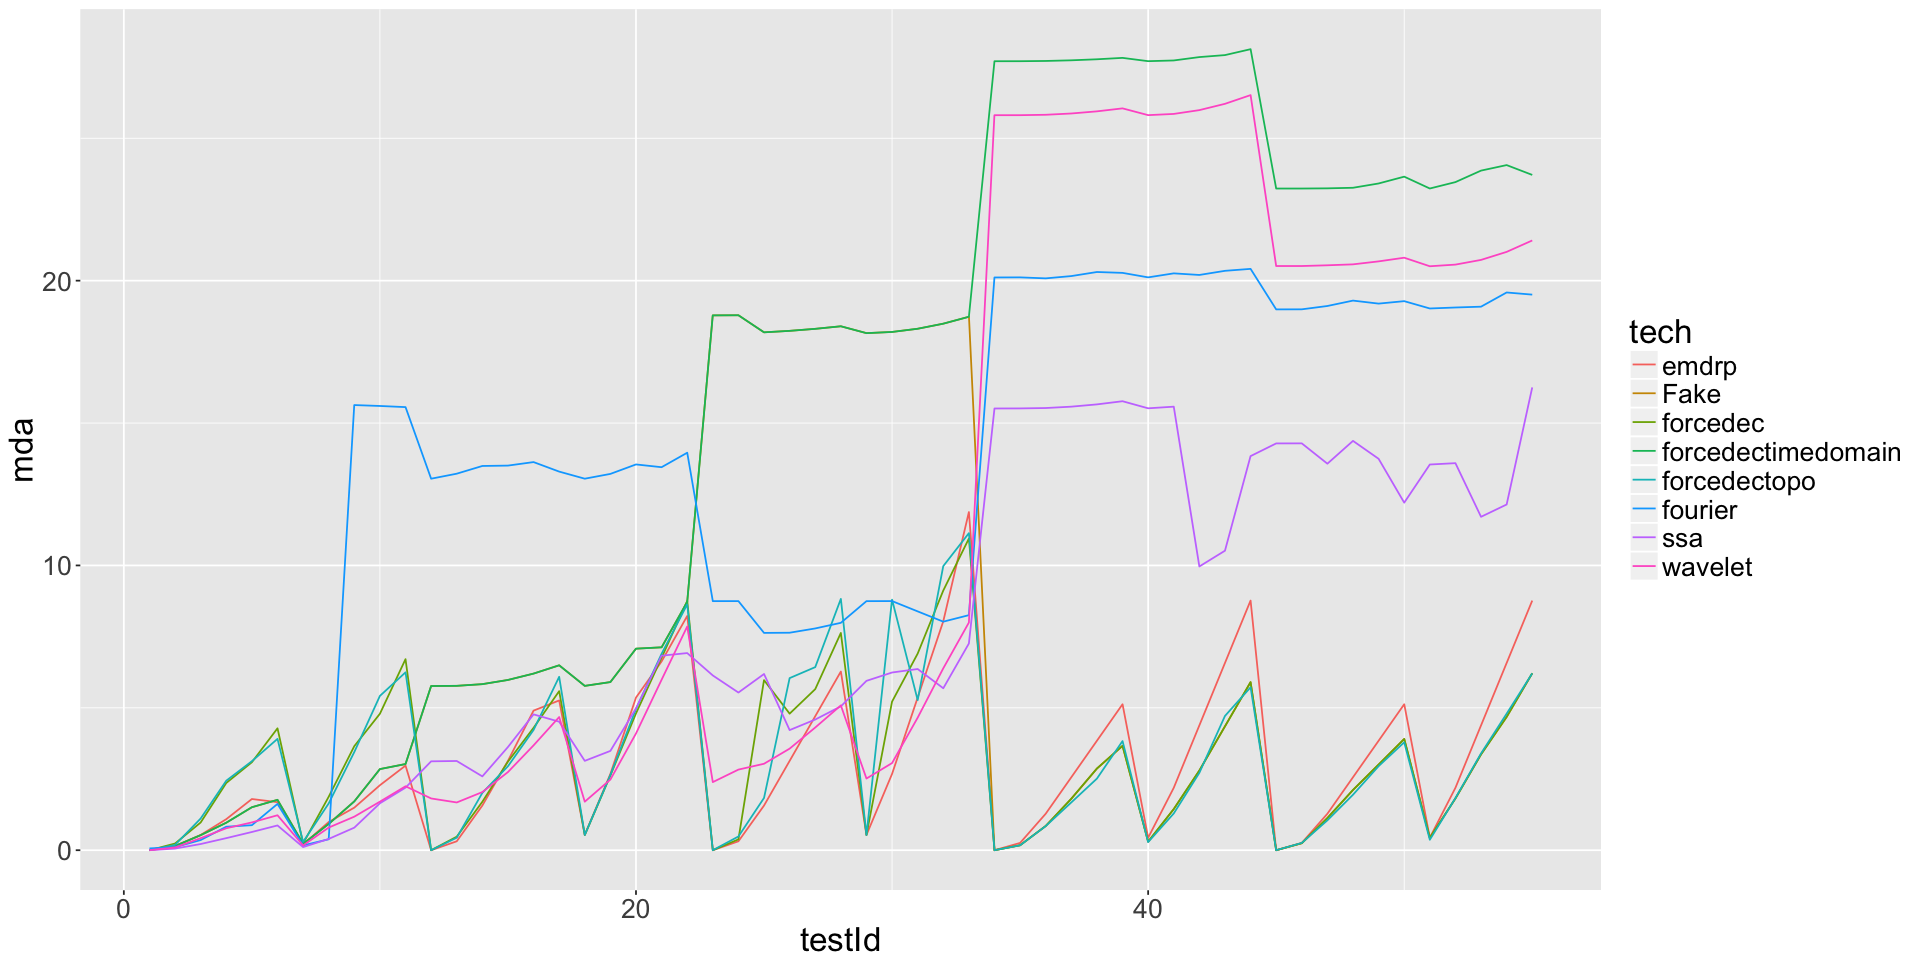

In [72]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

In [73]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,13.1420430837582,6.81700248610247
wavelet,11.0495331959186,10.3972655193003
ssa,7.75171400464606,5.60510807020618
emdrp,3.03886687623324,2.82752379542341
forcedec,3.1834831216988,2.71810129021795
forcedectopo,3.2164071831736,2.88590448772561
forcedectimedomain,15.760238570662,10.0746787201757
Fake,6.14484246417047,6.58205640008413


pdf 
  2

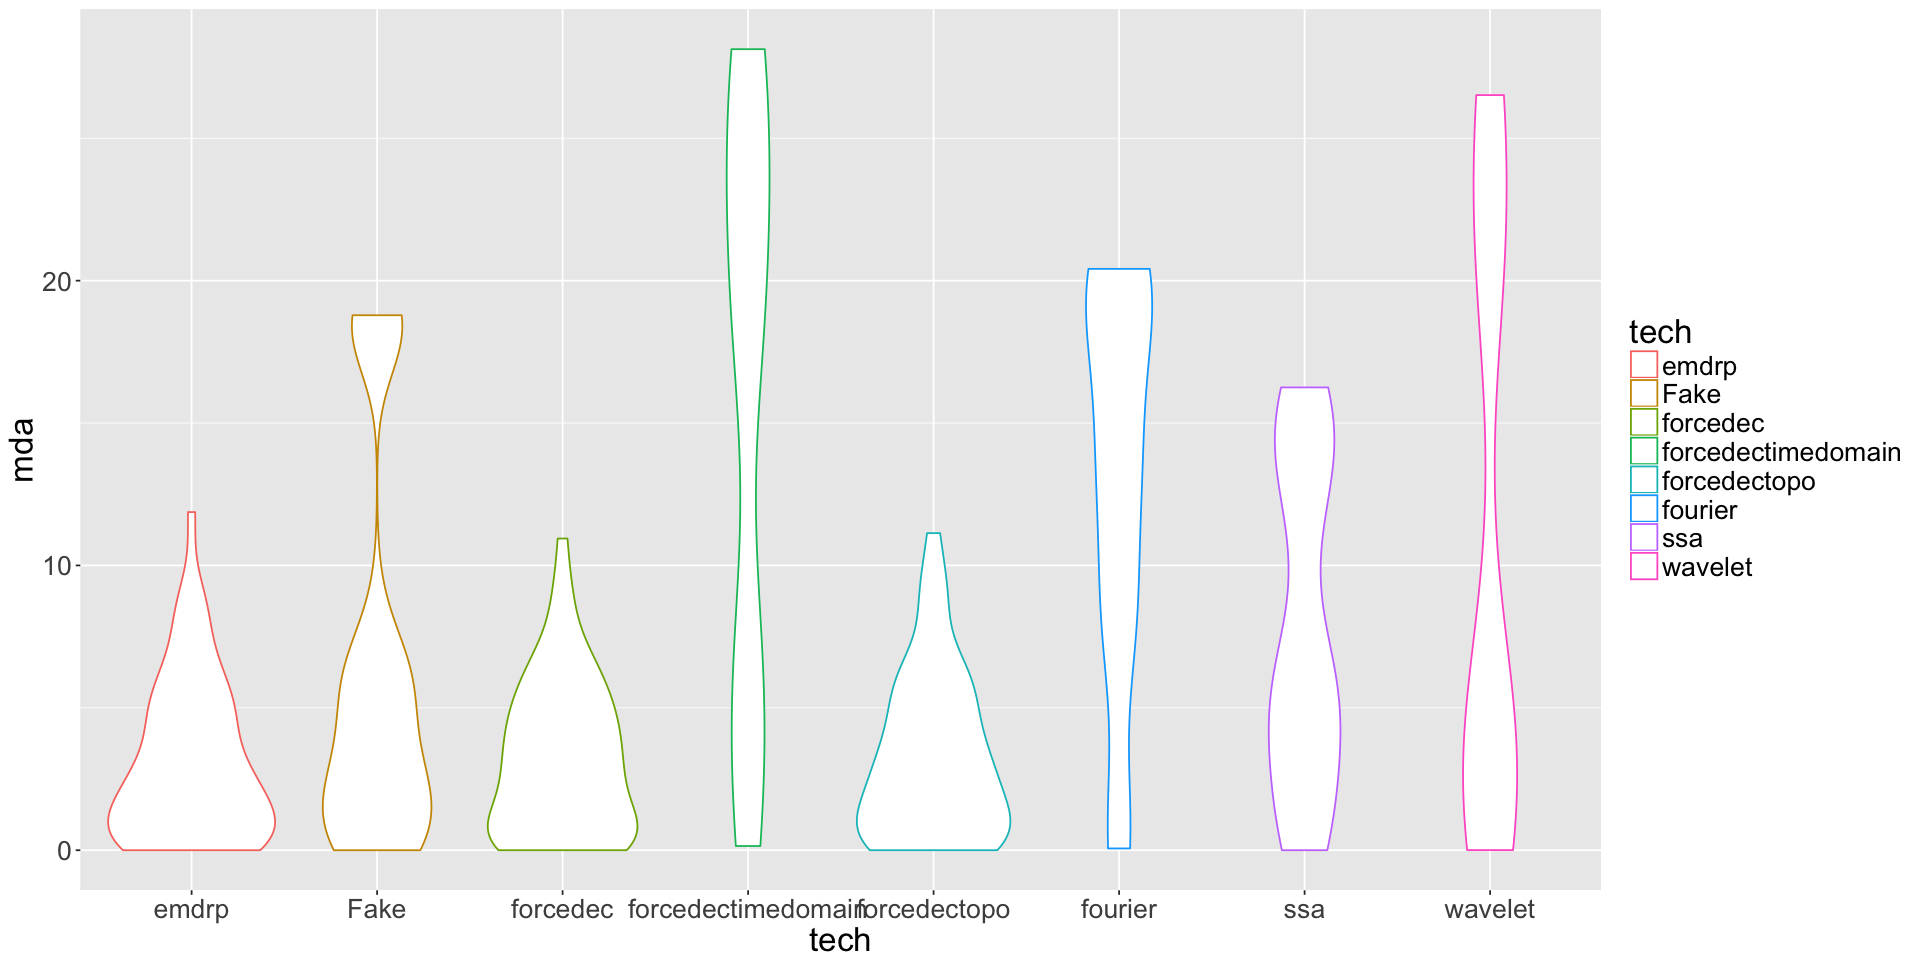

In [74]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(tech, mda, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda_violin.pdf", sep='/'), width=16, height=5)

pdf 
  2

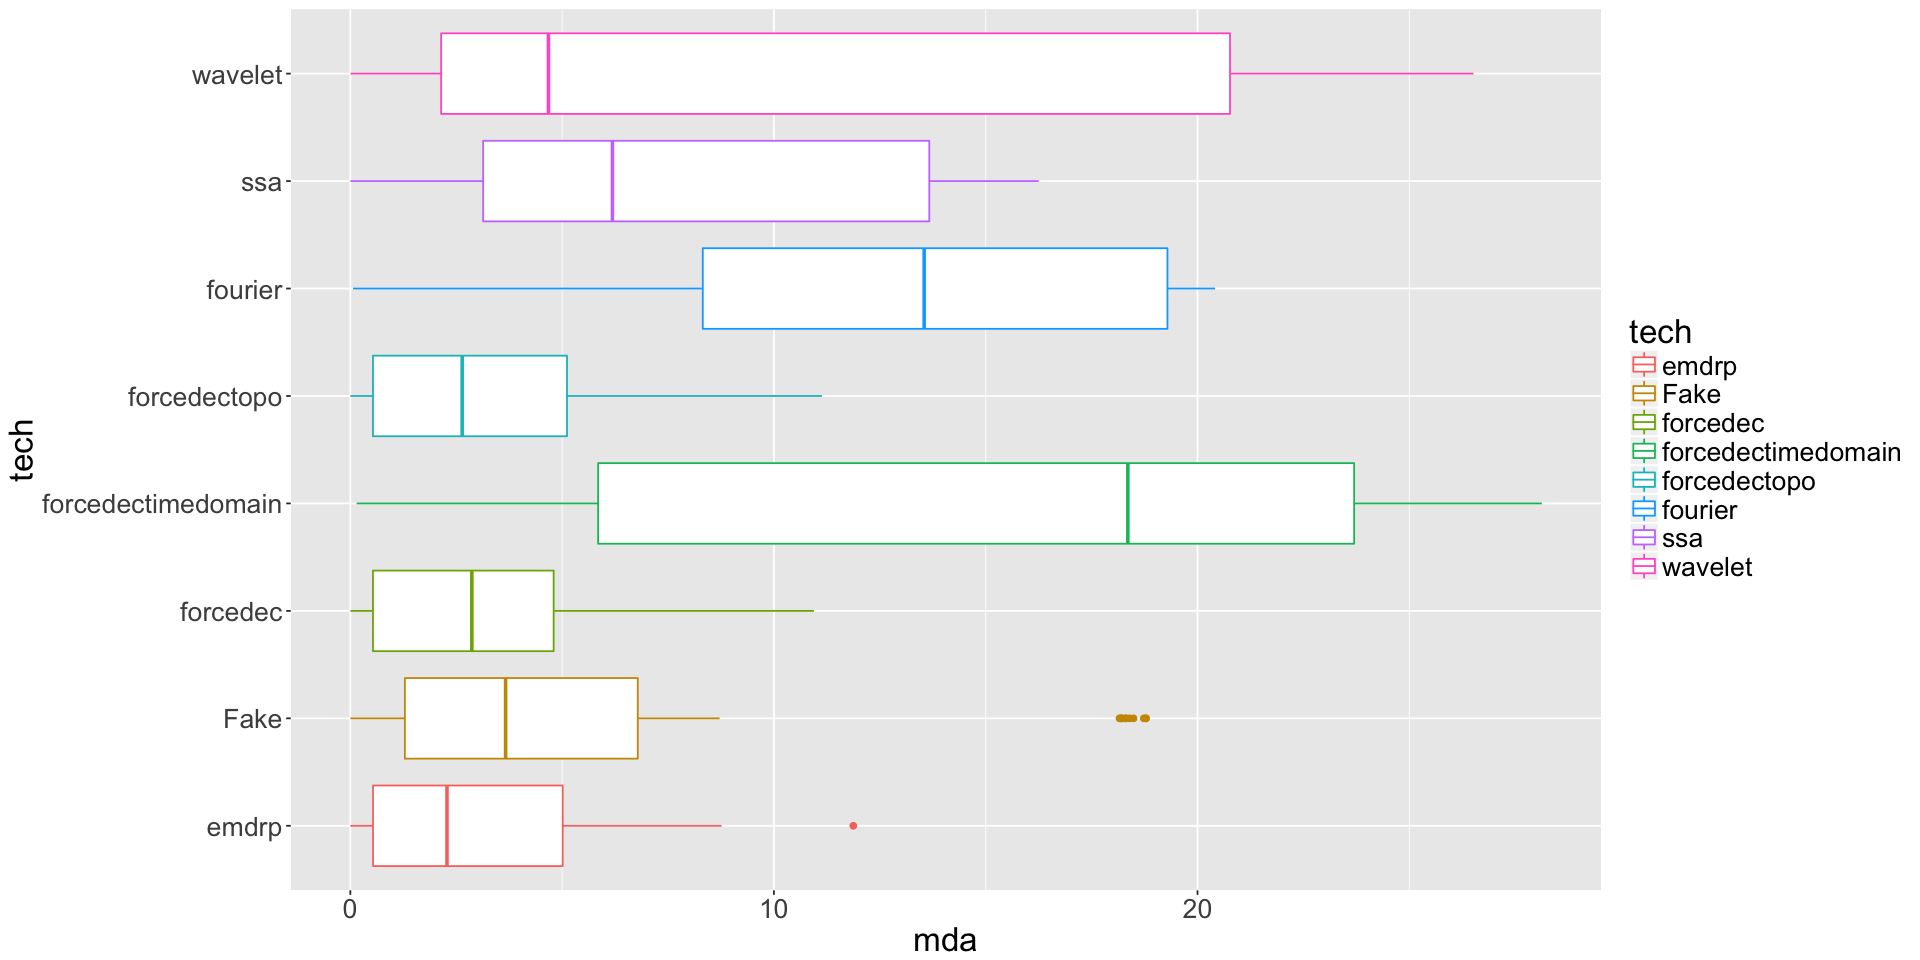

In [75]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, mda, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mda_boxplot.pdf", sep='/'), width=16, height=5)

Métrica: Dist
===

In [84]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

pdf 
  2

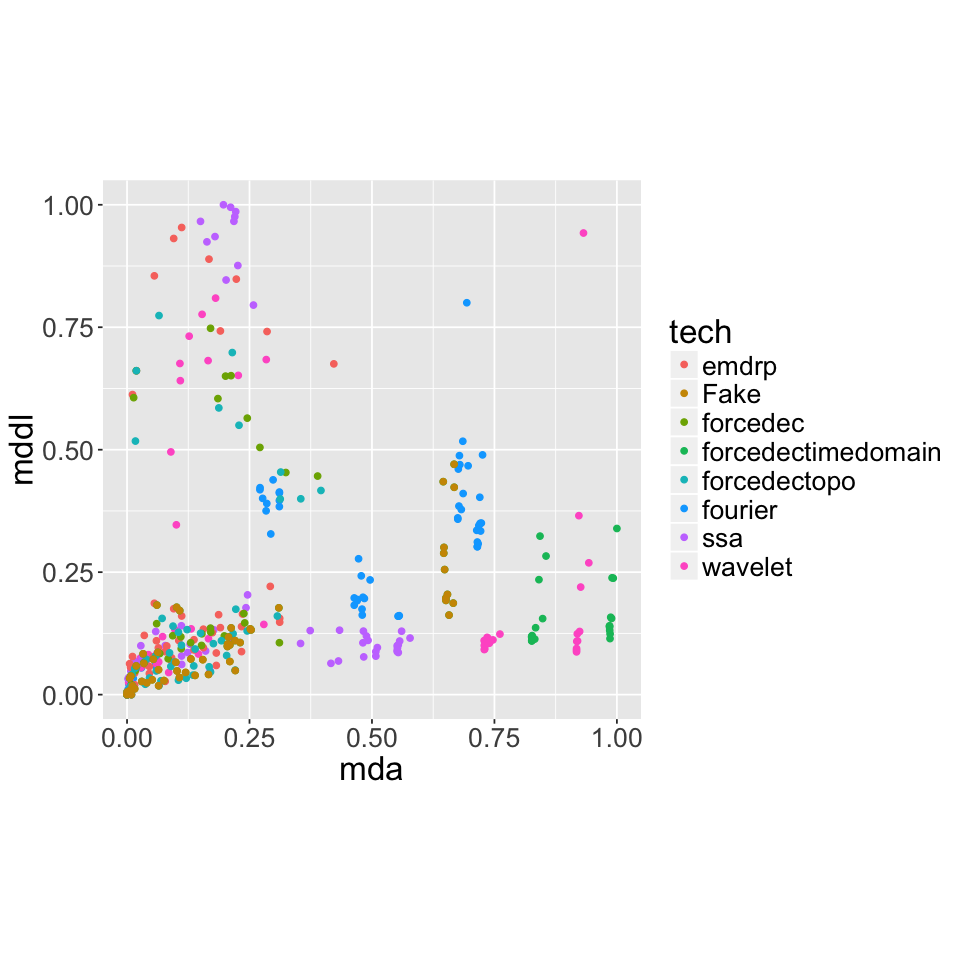

In [85]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + 
    geom_point() + 
    theme(text = element_text(size=20)) + 
    coord_fixed()
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_scatterplot.pdf", sep='/'), width=16, height=5)

Warning message:
“Removed 198 rows containing missing values (geom_point).”

pdf 
  2

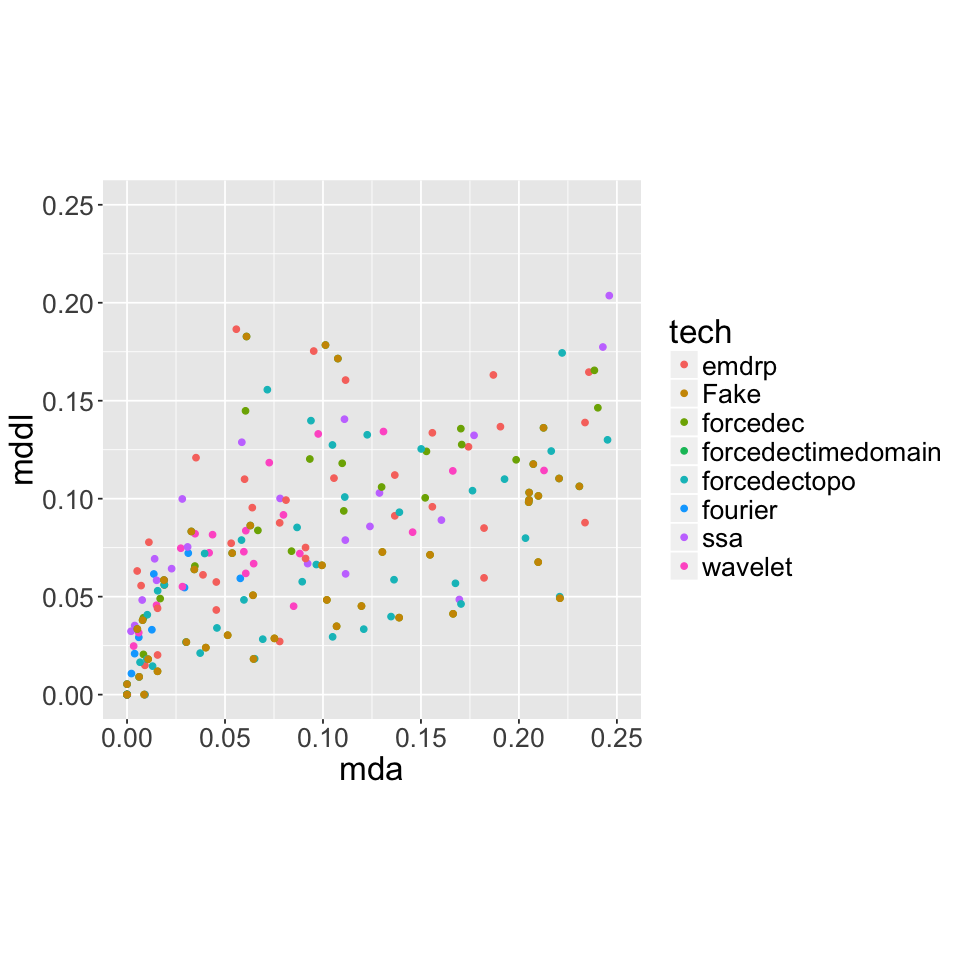

In [81]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + geom_point() + theme(text = element_text(size=20)) + coord_fixed() + xlim(0, 0.25) + ylim(0, 0.25)
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_zoom_scatterplot.pdf", sep='/'), width=16, height=5)

pdf 
  2

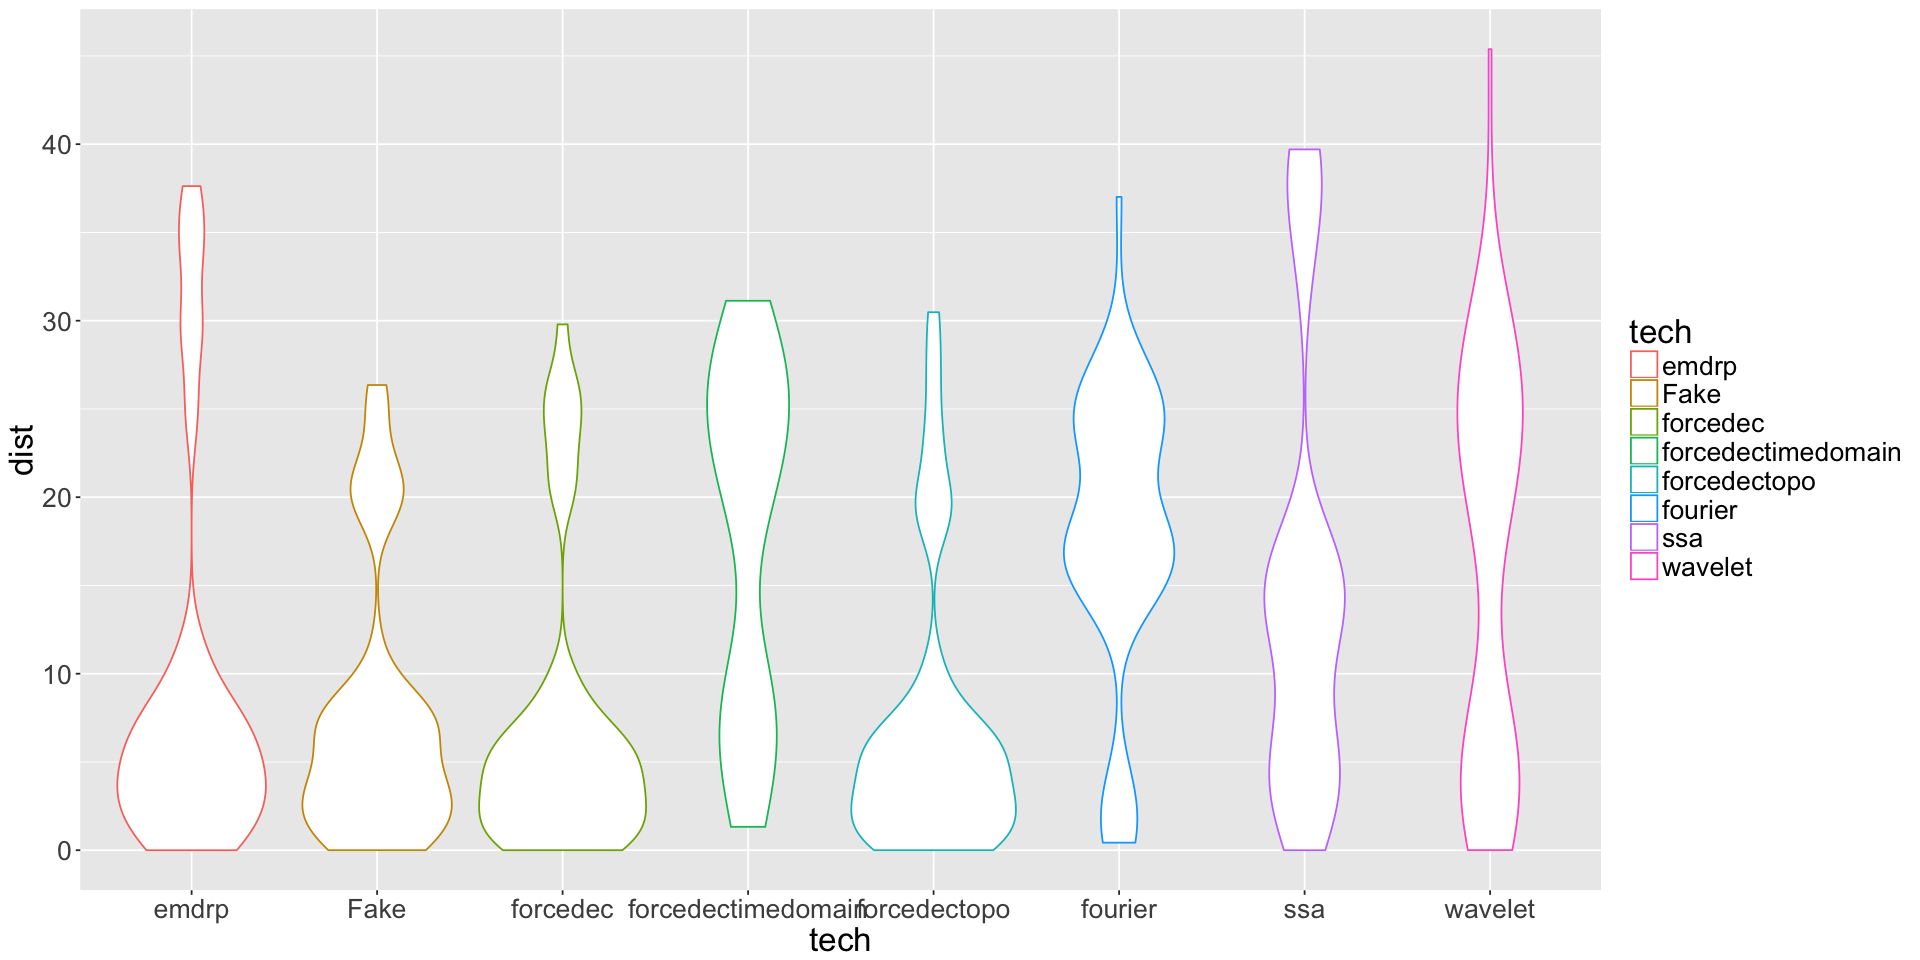

In [82]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)

pdf 
  2

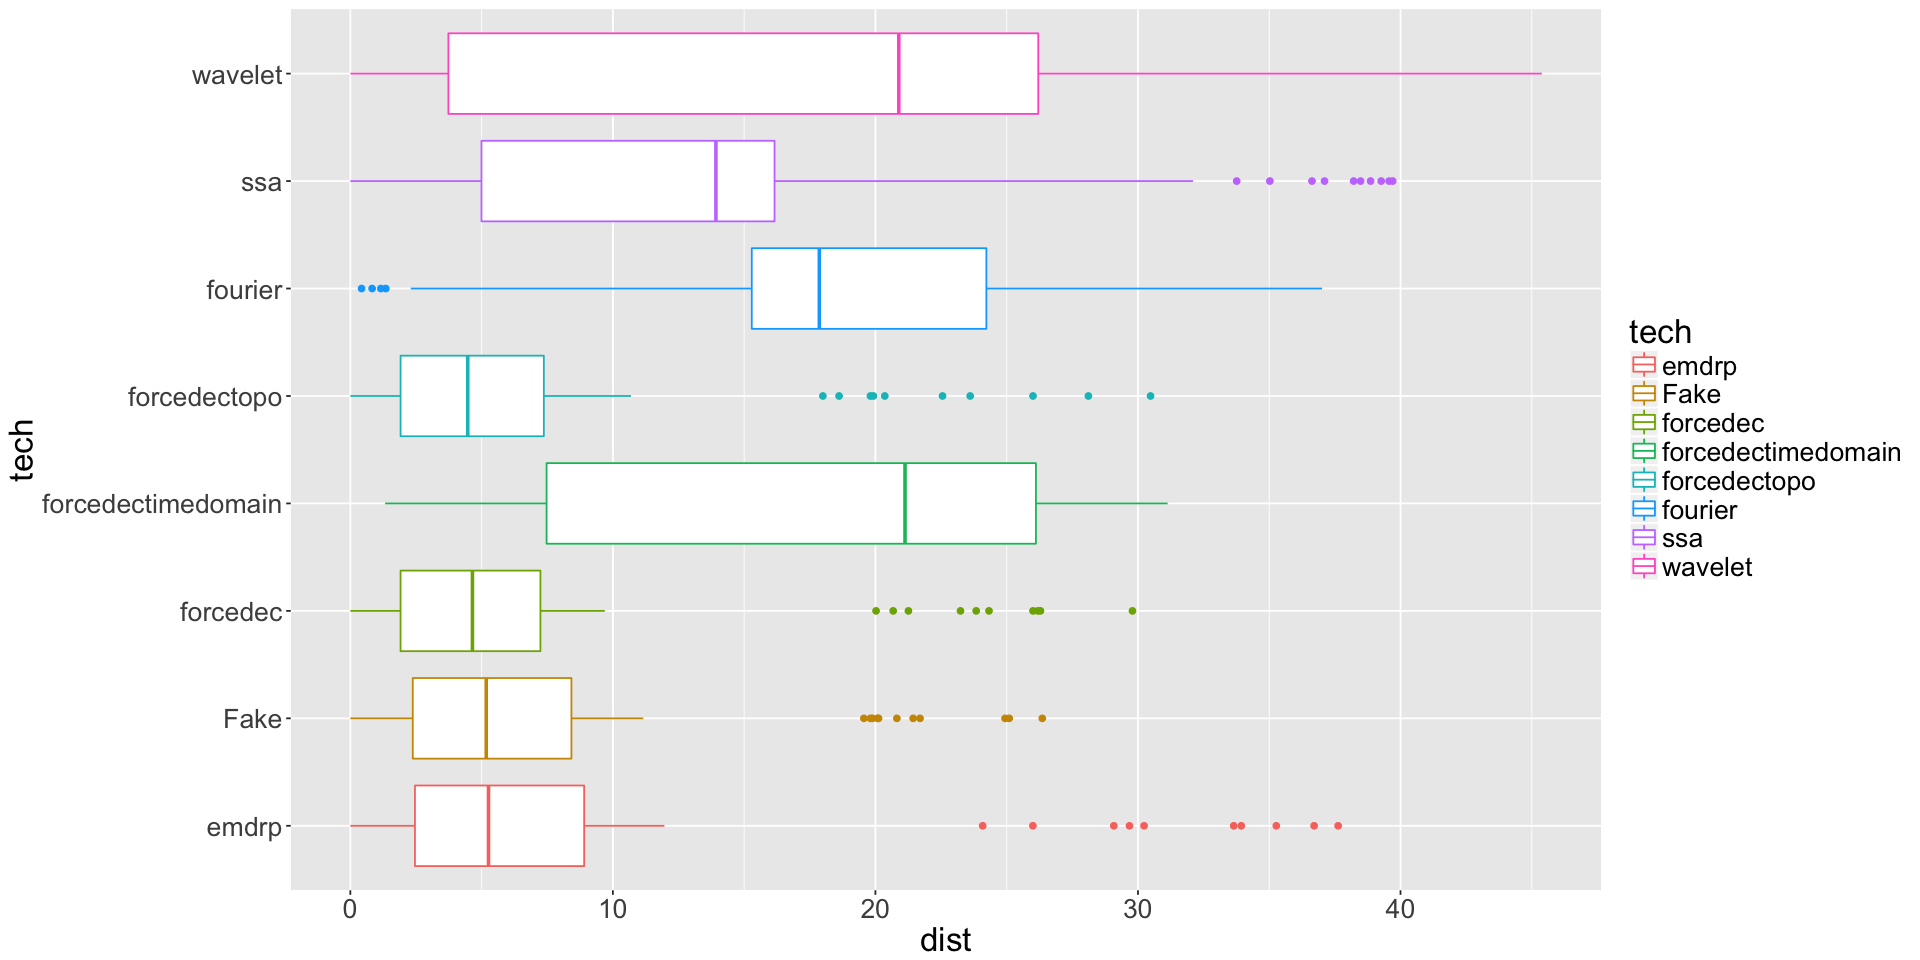

In [83]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_boxplot.pdf", sep='/'), width=16, height=5)

In [95]:
m = merge(aggregate(dist ~ tech, data, mean), aggregate(dist ~ tech, data, sd), by='tech')
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
emdrp,9.441805,11.089702
Fake,7.790305,7.621781
forcedec,7.415560,8.427543
forcedectimedomain,17.665581,9.800408
forcedectopo,7.193233,8.006693
fourier,18.070743,8.196442
ssa,15.025858,12.285376
wavelet,16.293460,11.449331


---
Dataset Seno
===

In [115]:
scenario.idx = 1:11

pdf 
  2

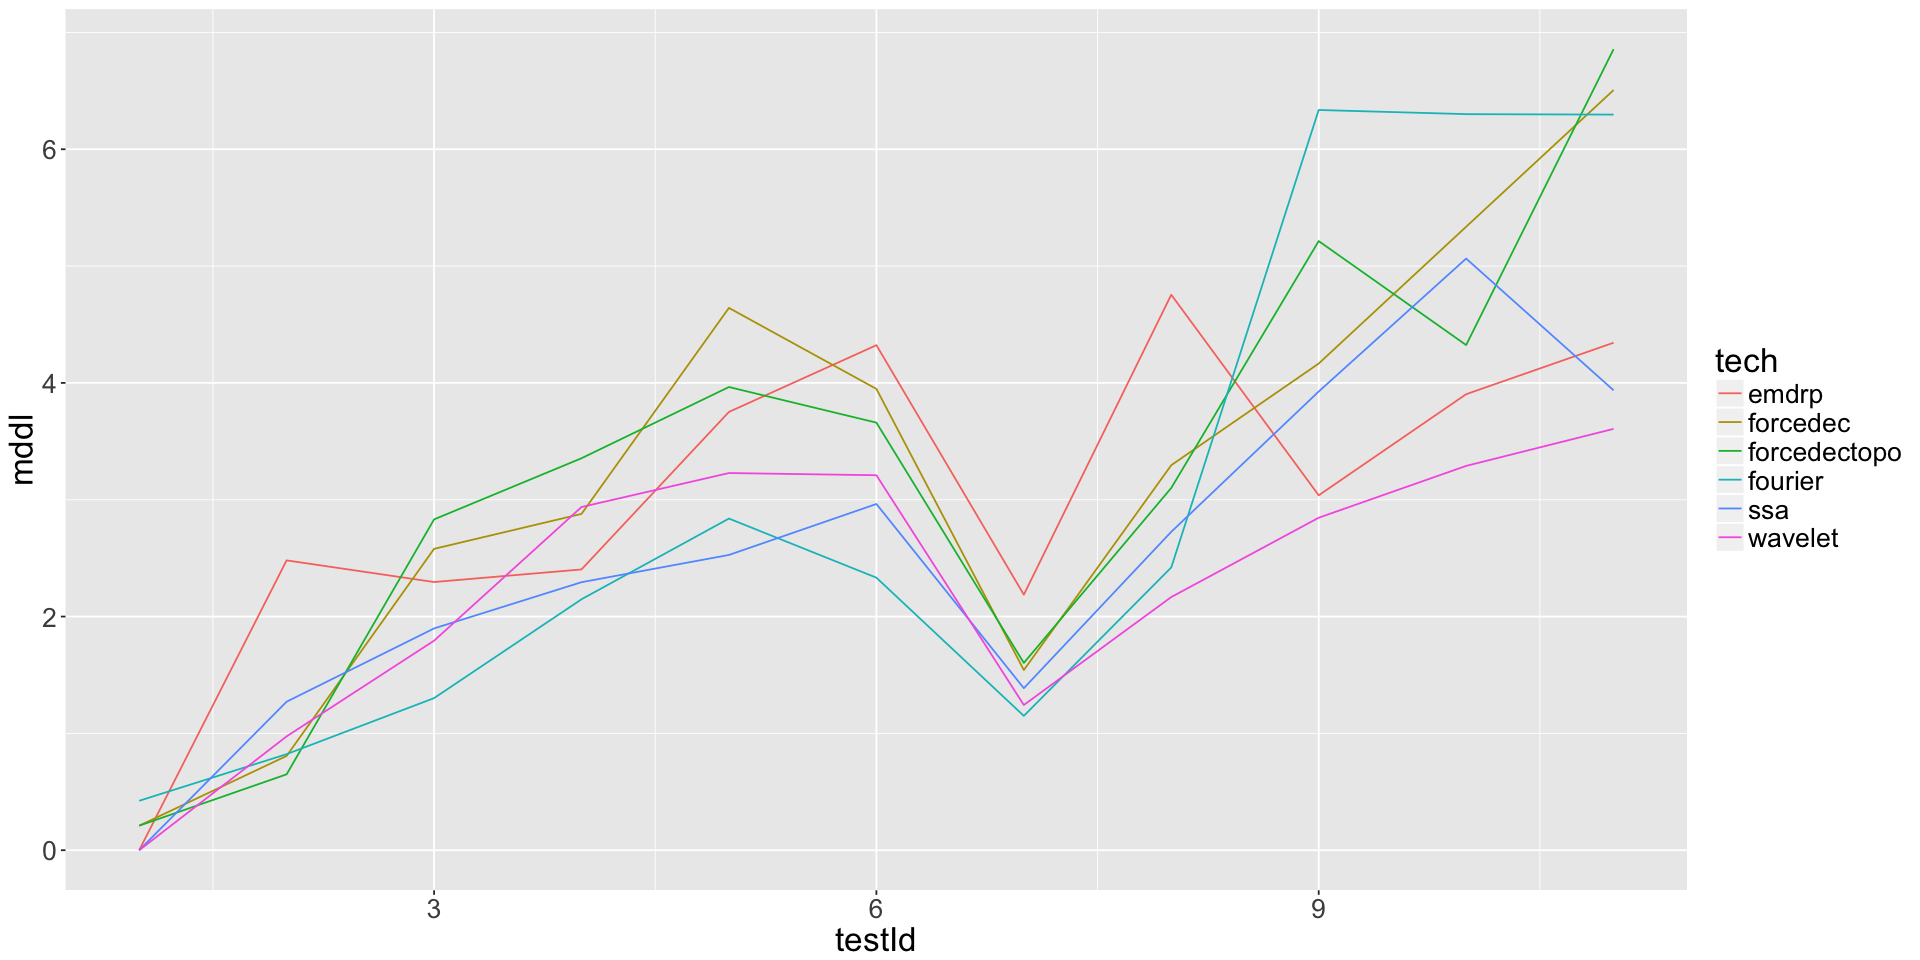

In [116]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

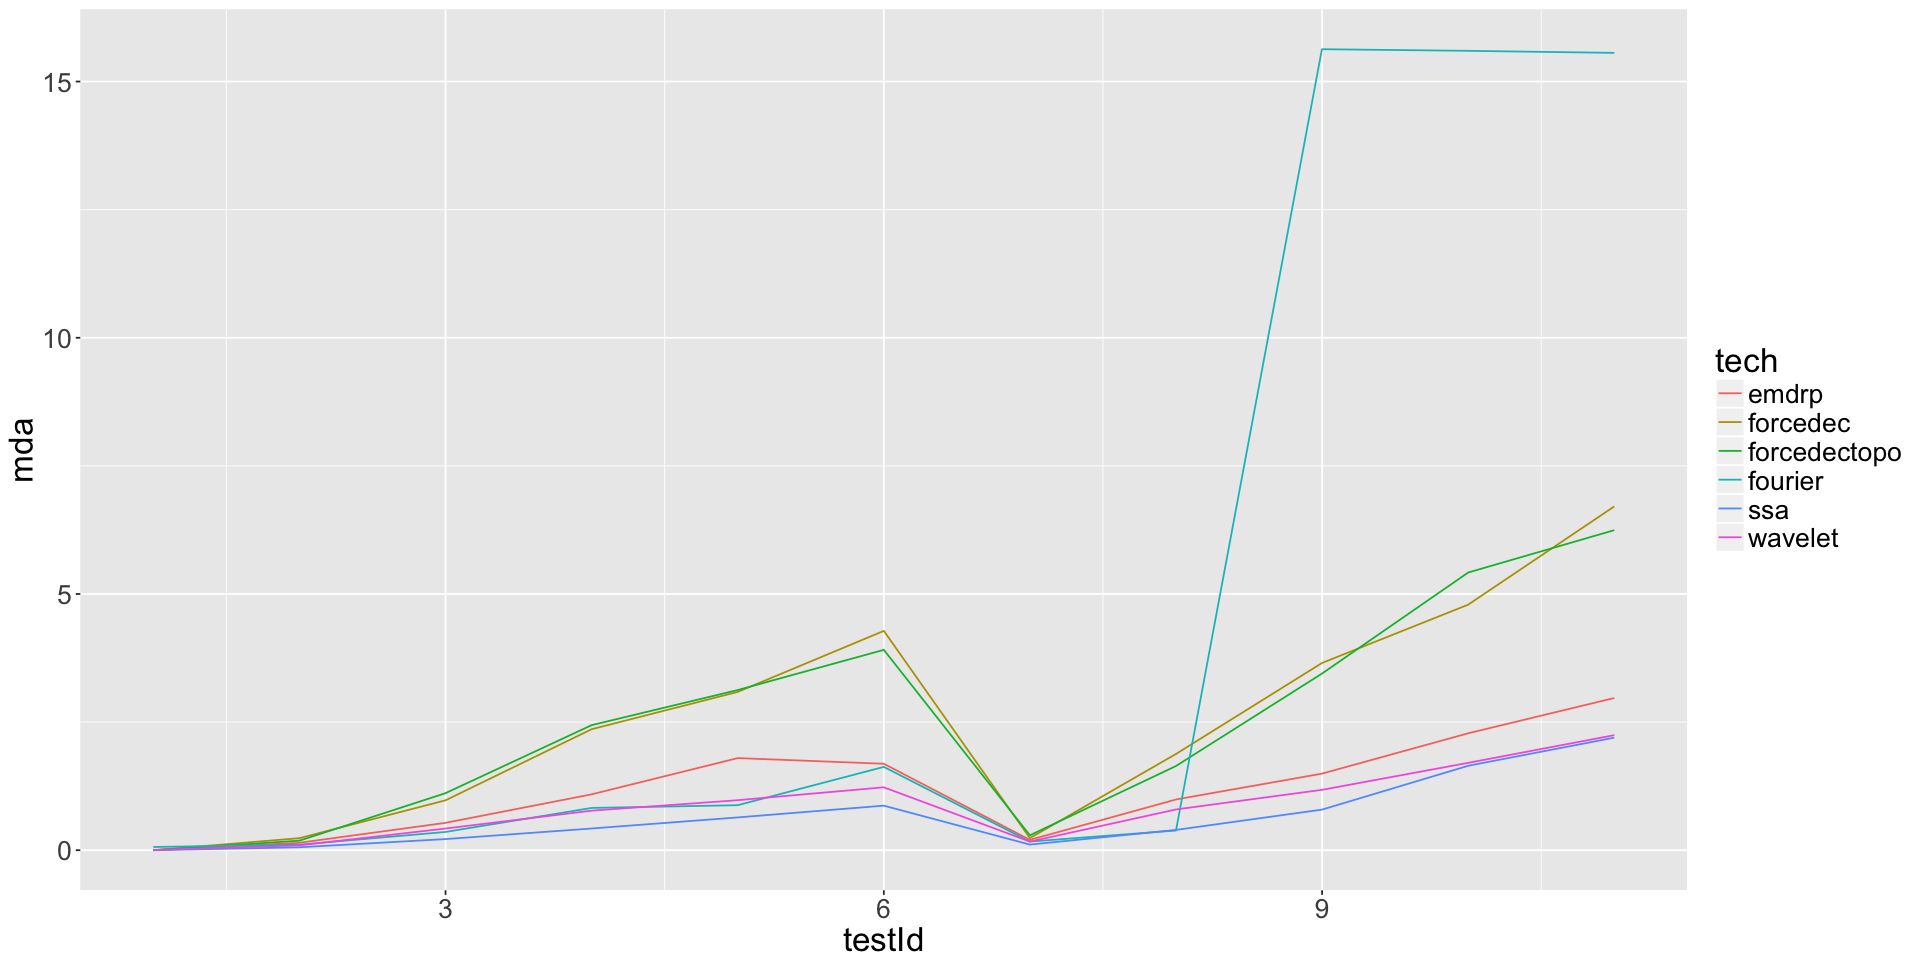

In [117]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mda.pdf", sep='/'), width=16, height=5)

In [118]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

pdf 
  2

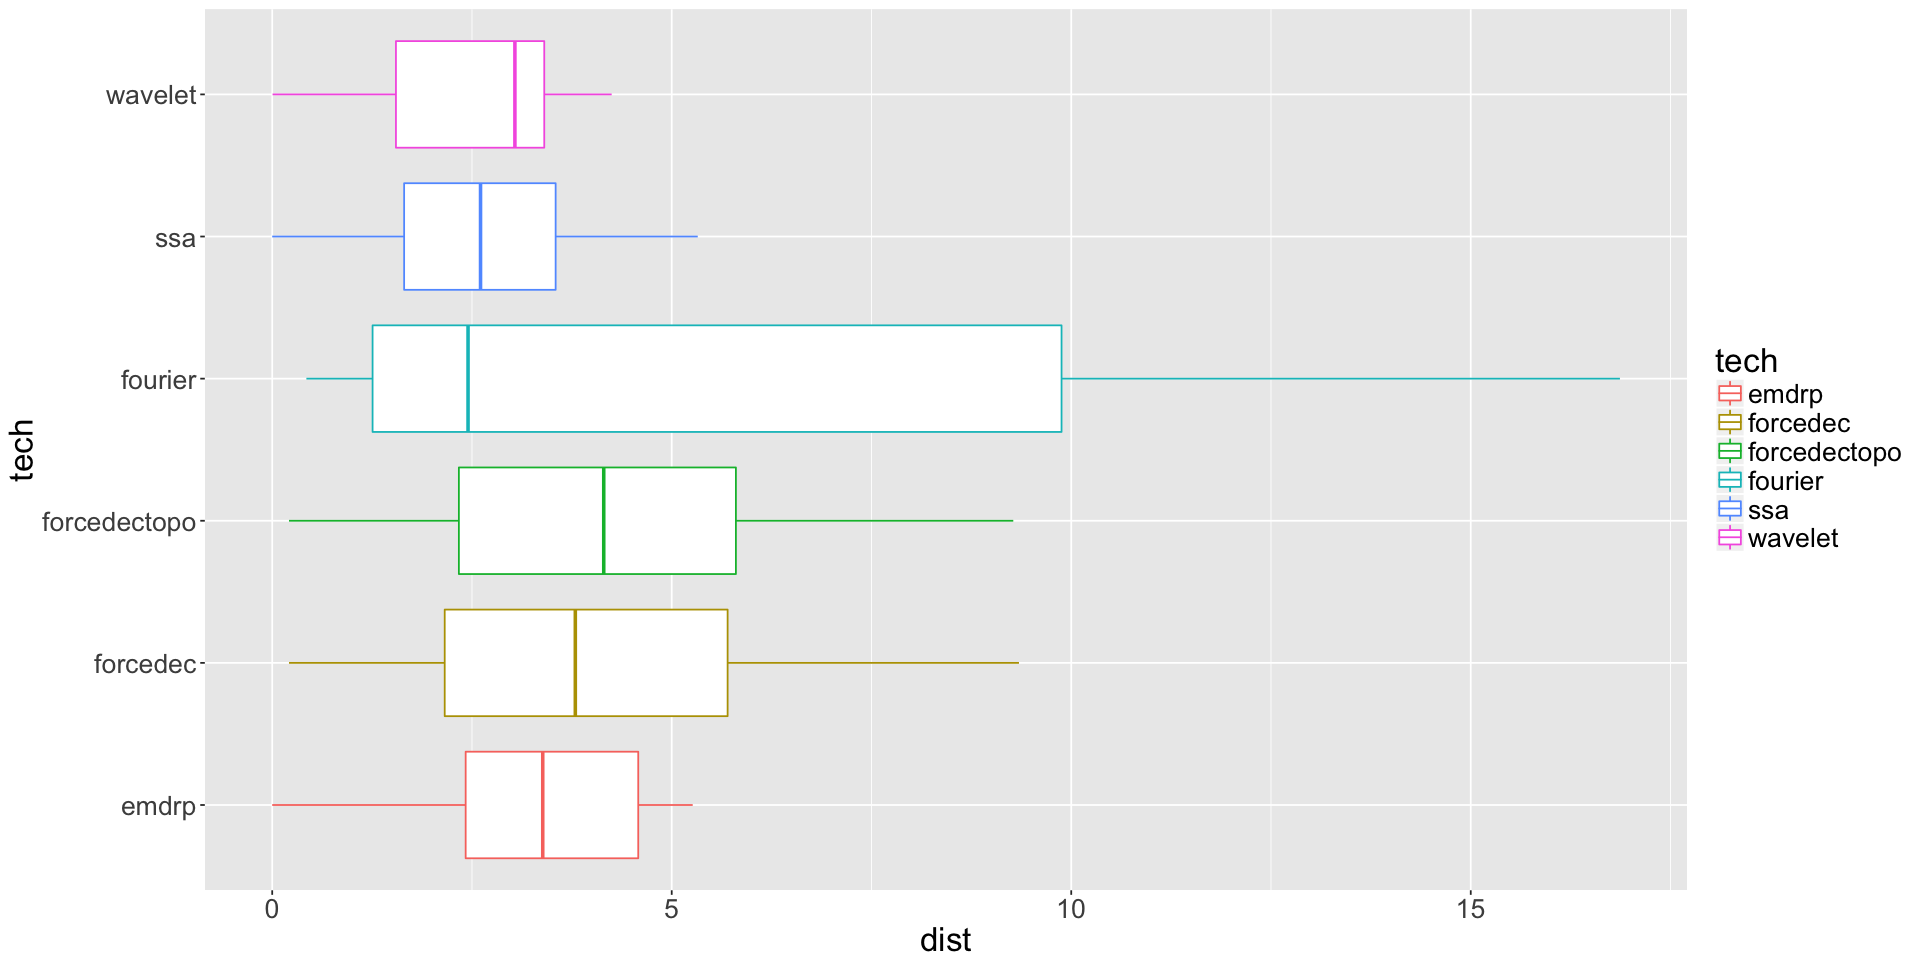

In [119]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"seno_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Lorenz
===

In [108]:
scenario.idx = 12:22

pdf 
  2

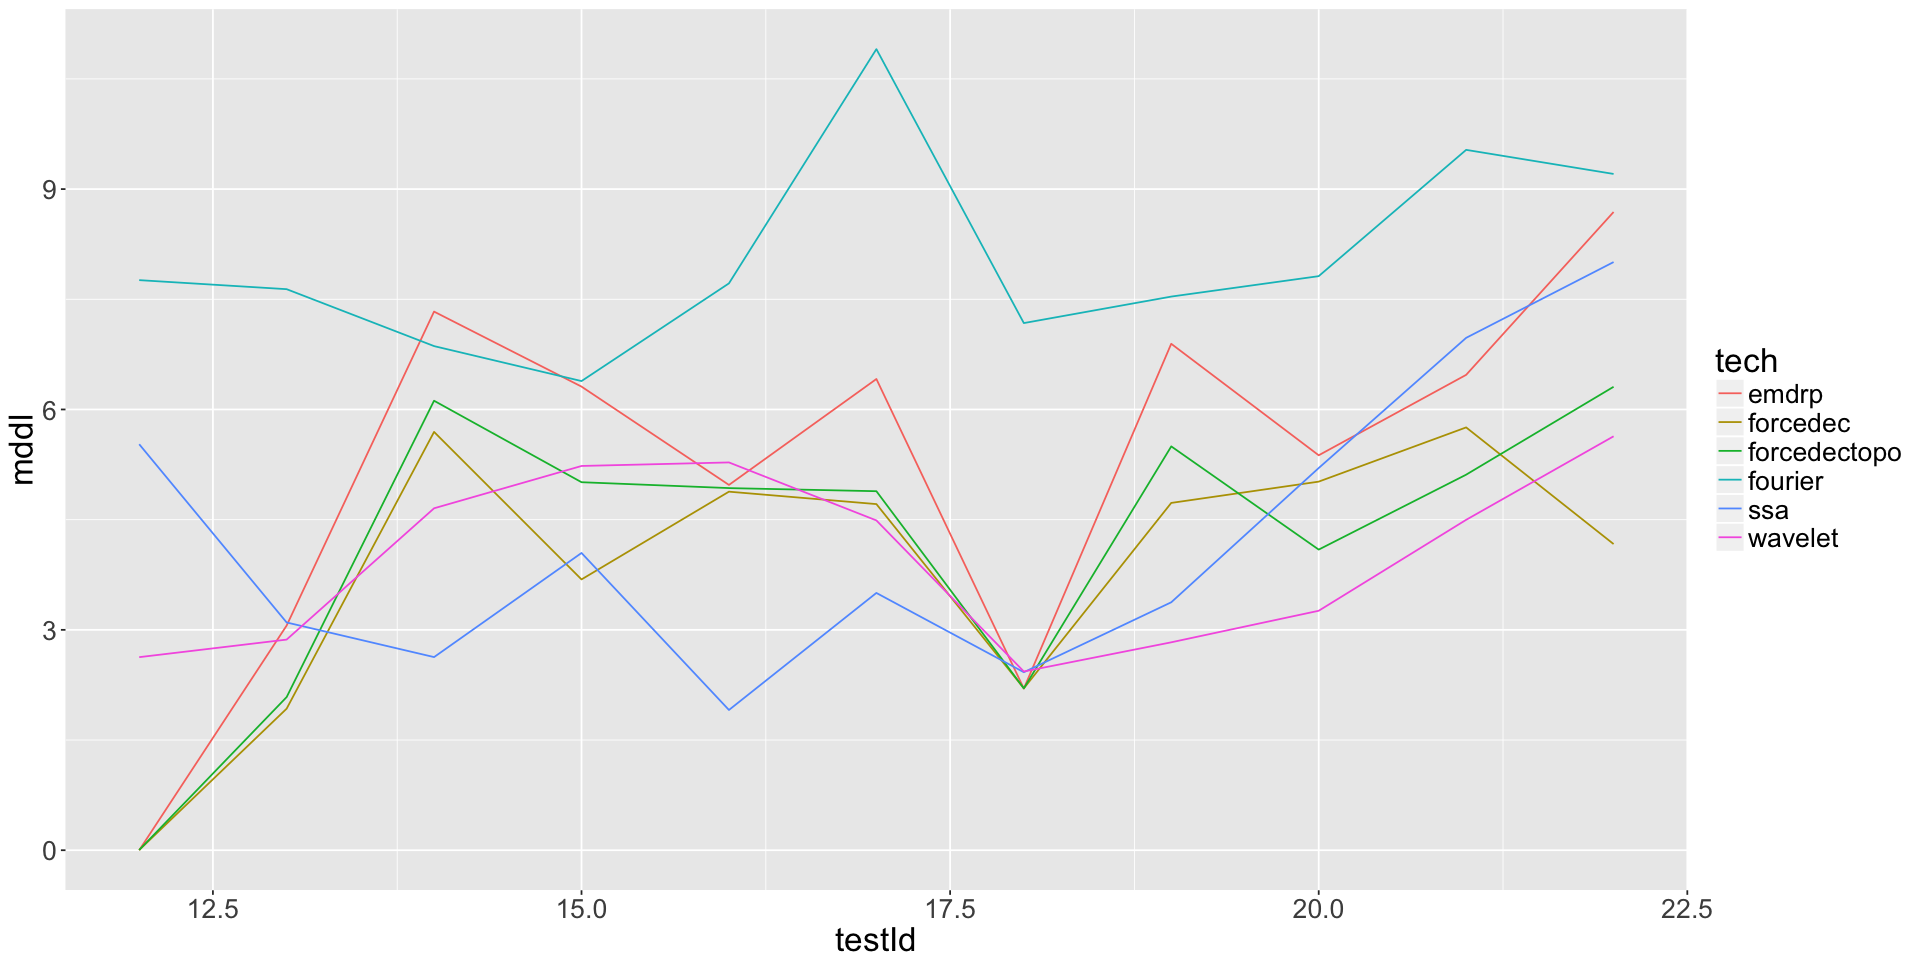

In [112]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

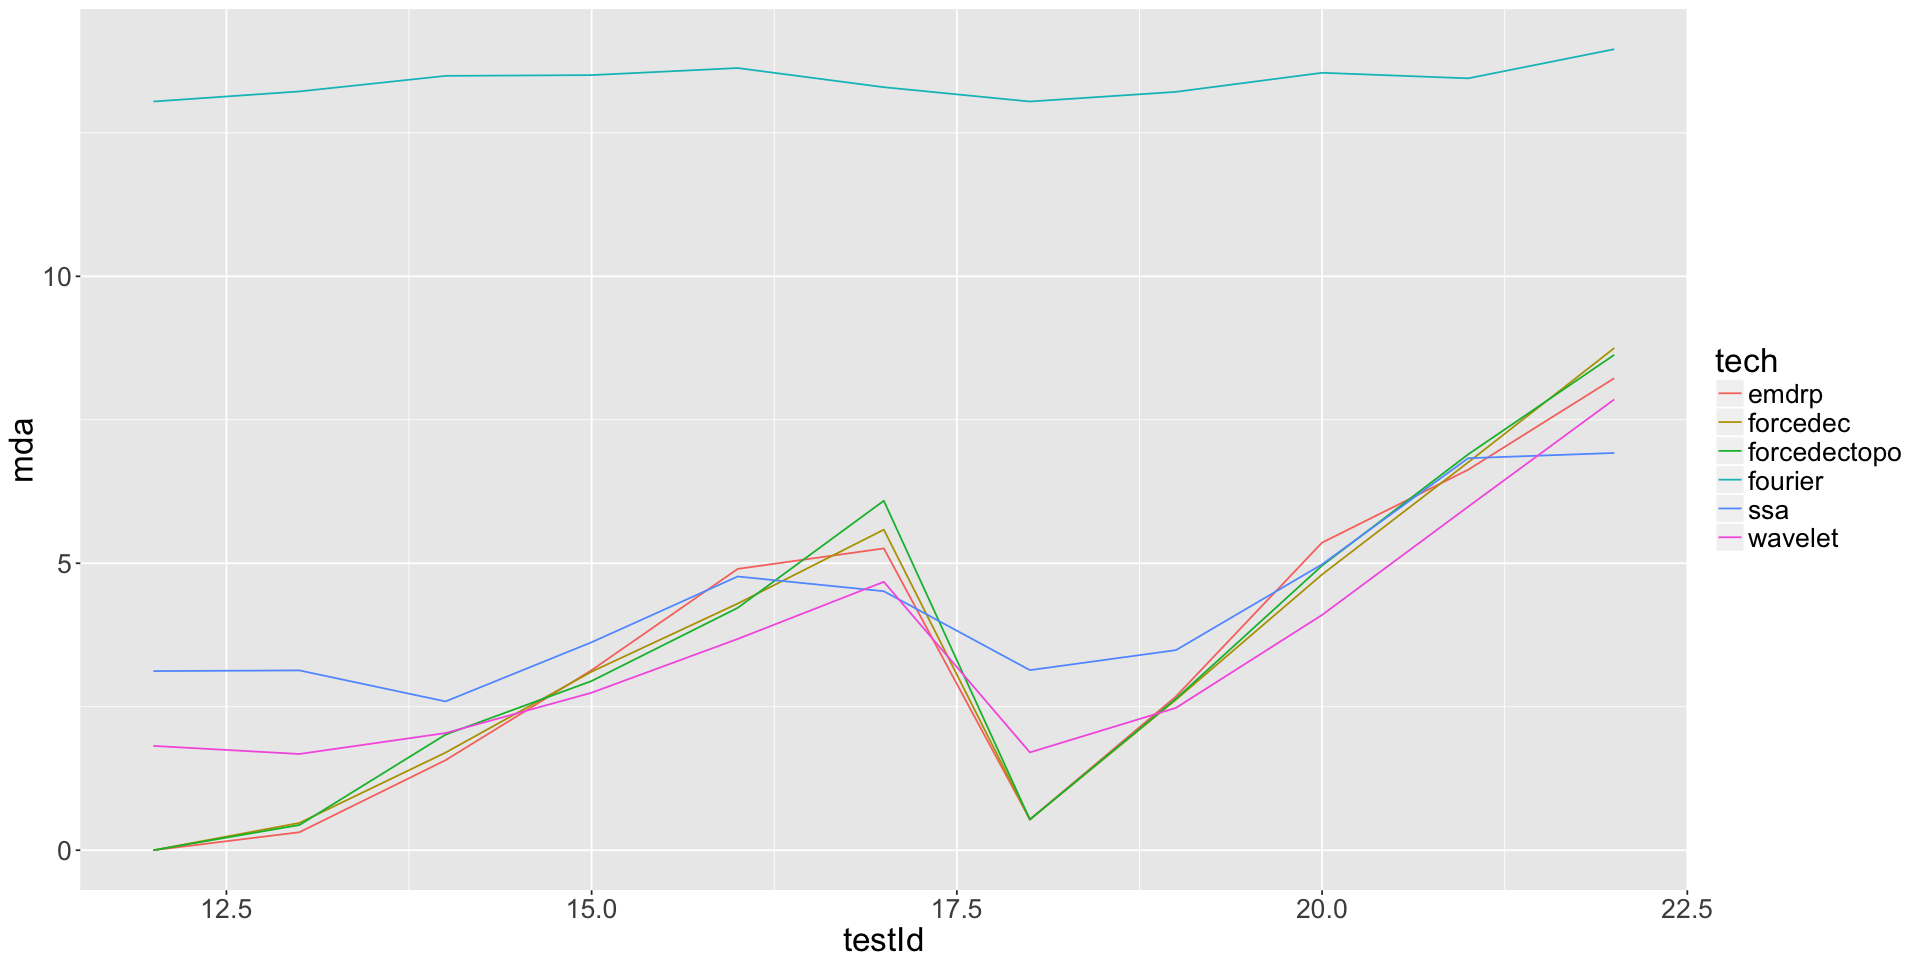

In [113]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

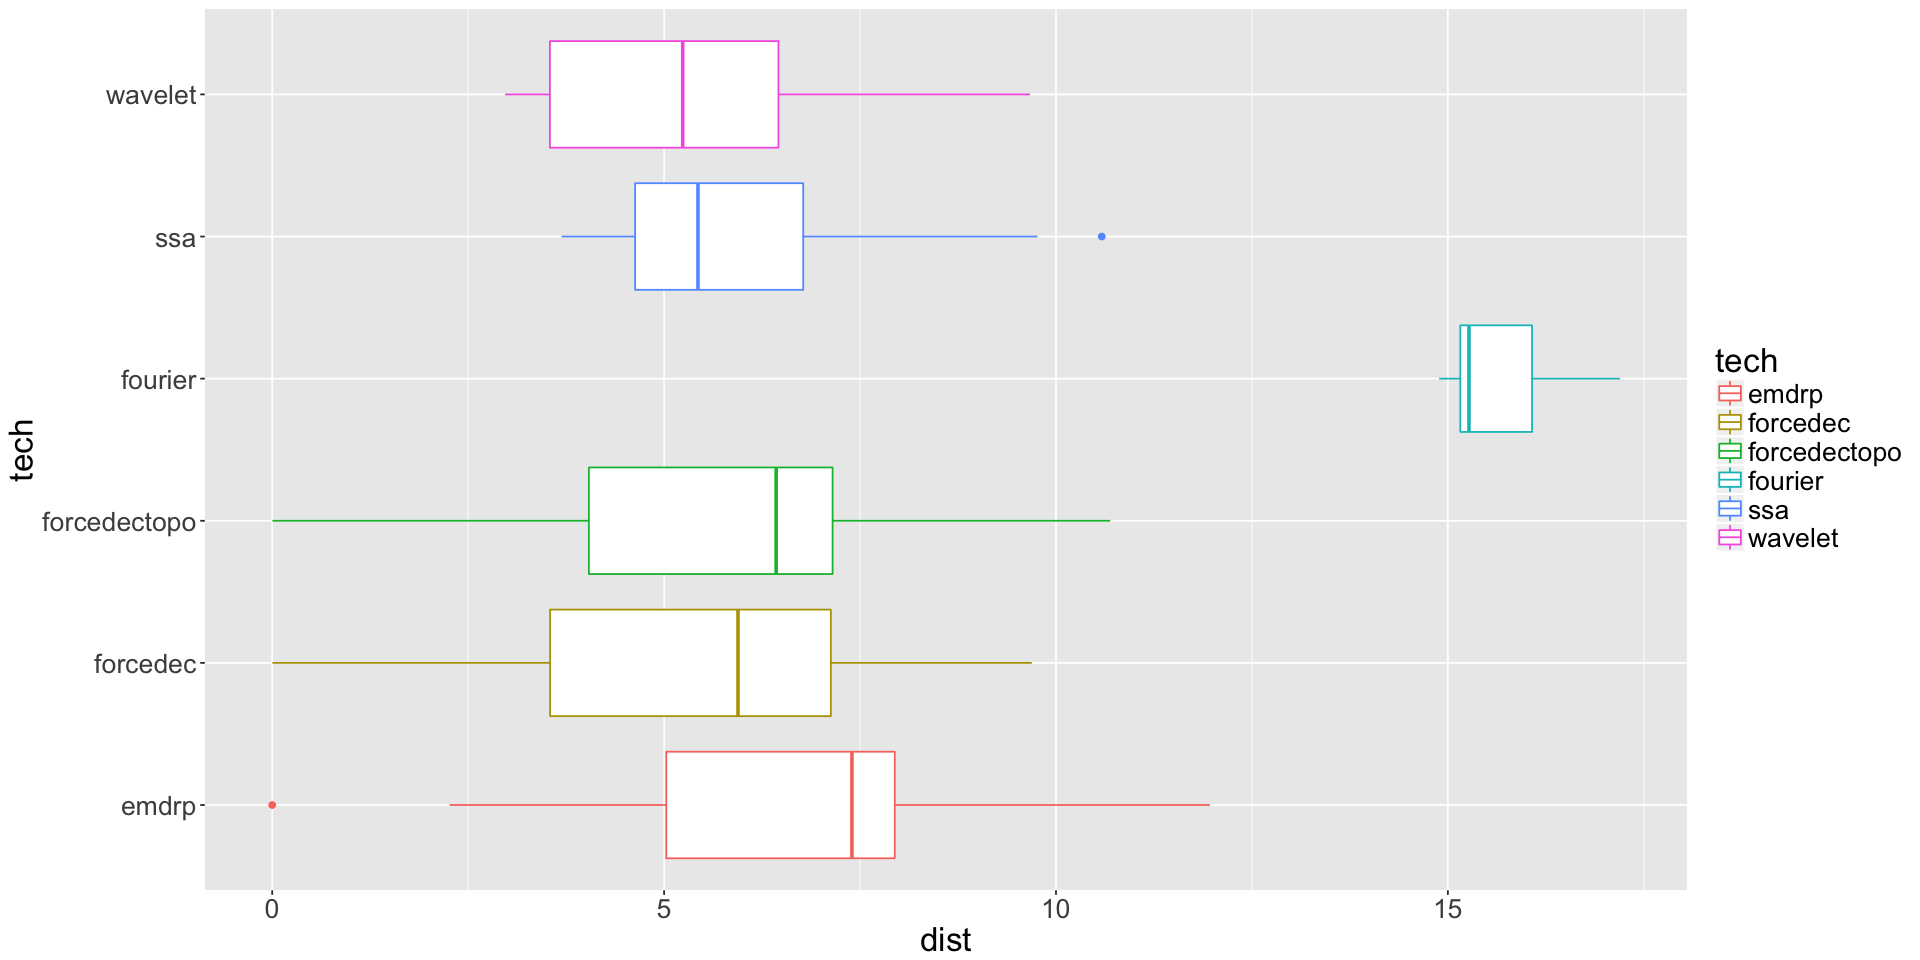

In [114]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_dist_boxplot.pdf", sep='/'), width=16, height=5)